# CROP RECOMMENDATION USING WEATHER AND SOIL CONTENT



- <h3> Machine Learning is well equipped when it comes to analyzing data regarding soil conditions, including moisture level, temperature, and chemical makeup, all of which have an impact upon crop growth and livestock well-being.<br>
- <h3> Today in agriculture, this can allow crops to be grown at much higher precision, enabling farmers to treat plants and animals almost individually, which in turn significantly increases the effectiveness of farmers' decisions.<br>
- <h3> Using this can develop means to even predict harvest yields and evaluate crop quality for individual plant species to detect crop disease and weed infestations which were previouly impossible!

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cpdata_df = pd.read_csv(r"P:\Paritosh_personal\data science\data science\Capstone Project ML-O_N_D\cpdata.csv")
cpdata_df.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [3]:
cpdata_df.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [4]:
cpdata_df.dtypes

temperature    float64
humidity       float64
ph             float64
rainfall       float64
label           object
dtype: object

# Exploratory Data Analysis

<h4> <u>Let's have a closer look at the distribution of temperature and ph.</u><br><br>
    
It is symmetrical and bell shaped, showing that trials will usually give a result near the average, but will occasionally deviate by large amounts. It's also fascinating how these two really resemble each other!</h4>

<AxesSubplot:xlabel='ph', ylabel='Density'>

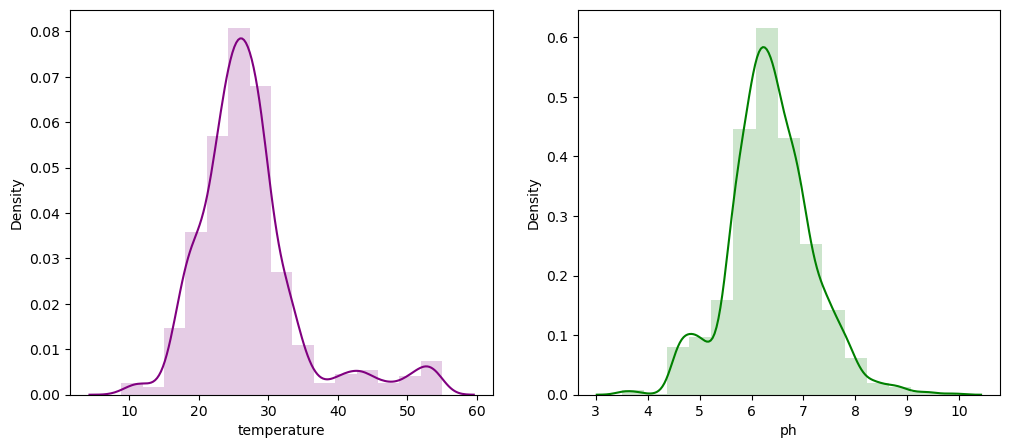

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)
# sns.distplot(df_setosa['sepal_length'],kde=True,color='green',bins=20,hist_kws={'alpha':0.3})
sns.distplot(cpdata_df['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(cpdata_df['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

<h4> A quick check if the dataset is balanced or not. If found imbalanced, we would have to downsample some targets which are more in quantity but so far everything looks good! <h4>

<AxesSubplot:xlabel='count', ylabel='label'>

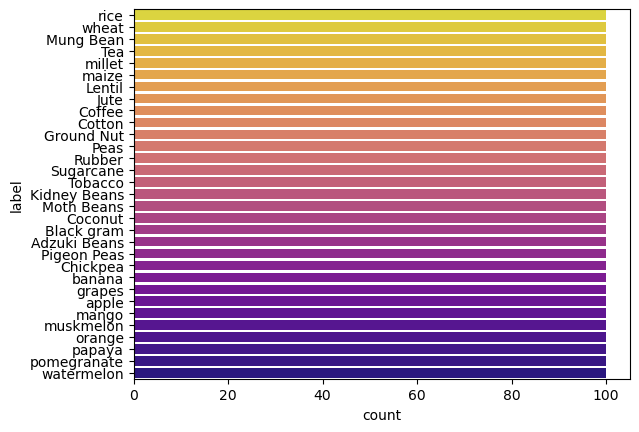

In [6]:
sns.countplot(y='label',data=cpdata_df, palette="plasma_r")

<h4> A very important plot to visualize the diagonal distribution between two features for all the combinations! It is great to visualize how classes differ from each other in a particular space.

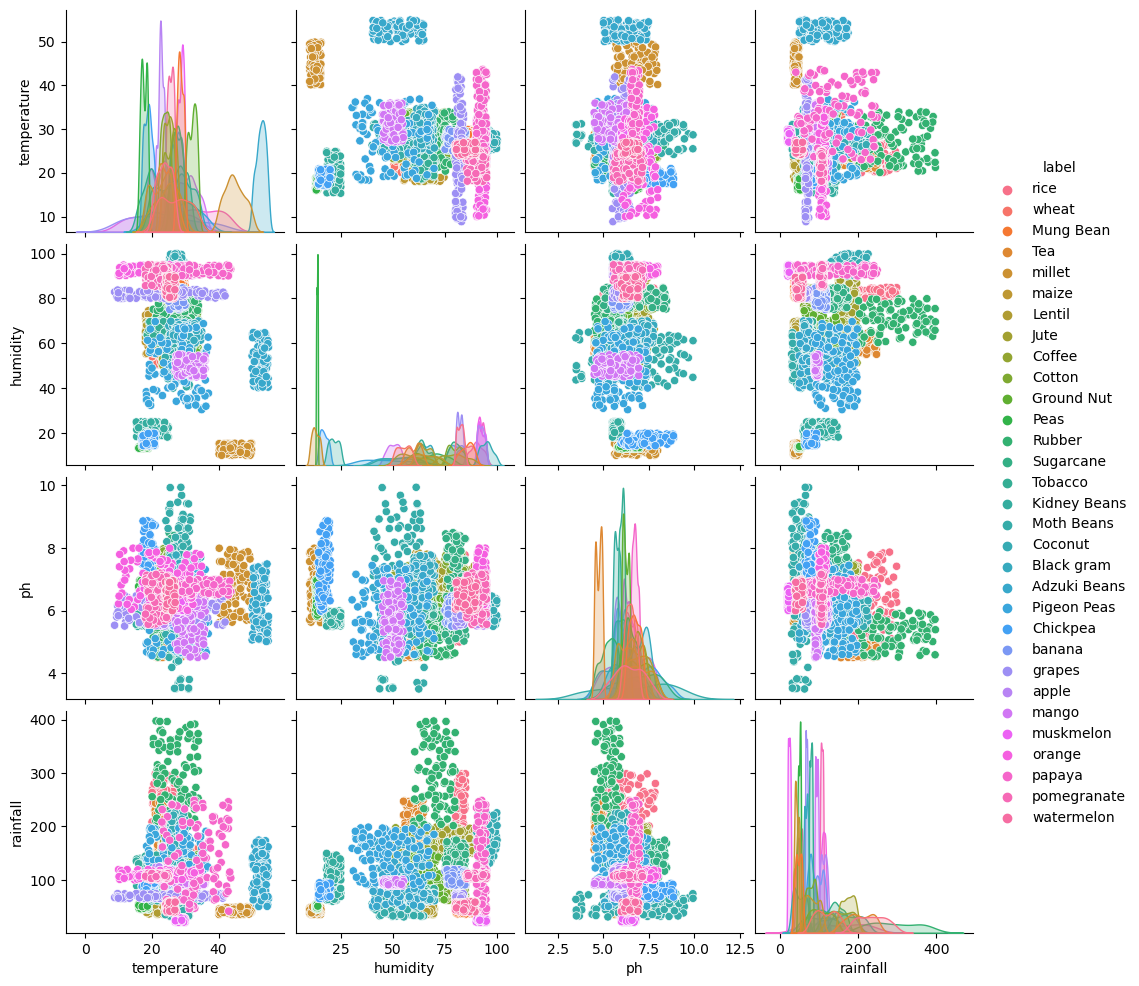

In [7]:
sns.pairplot(cpdata_df, hue = 'label')

#### During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).

#### Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season. 

- <b> Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
- <b> Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

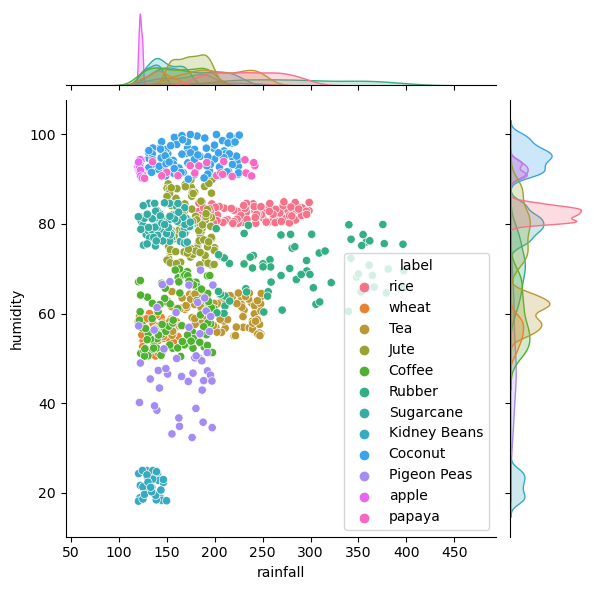

In [8]:
sns.jointplot(x="rainfall",y="humidity",data=cpdata_df[(cpdata_df['temperature']<30) & (cpdata_df['rainfall']>120)],hue="label")

#### We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<AxesSubplot:xlabel='ph', ylabel='label'>

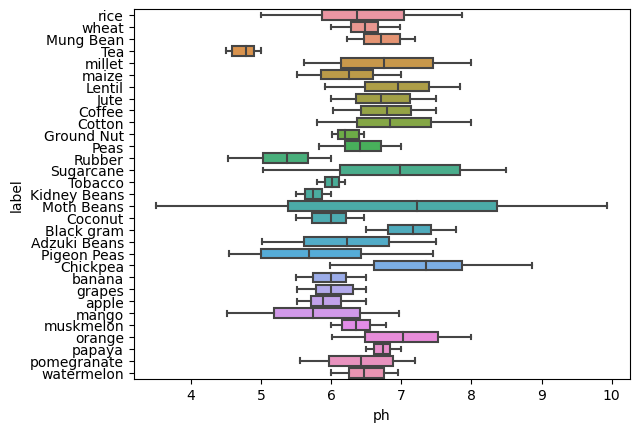

In [9]:
sns.boxplot(y='label',x='ph',data=cpdata_df)

# FEATURE SCALING
**Feature scaling is required before creating training data and feeding it to the model.**

In [10]:
c=cpdata_df.label.astype('category')
targets = dict(enumerate(c.cat.categories))
cpdata_df['target']=c.cat.codes

y=cpdata_df.target
X=cpdata_df[['temperature','humidity','ph','rainfall']]

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)

# MODEL SELECTION

## KNN Classifier for Crop prediction. 
<hr>

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)

0.8735483870967742